In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-FinalProject'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['prisondata.gsheet', 'prisondata.csv', 'newprisondata.csv', 'crime_and_incarceration_by_state.csv', 'gold_and_inflation.csv', 'Inflation.ipynb']


In [3]:
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, r2_score, mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, normalize, MinMaxScaler
from scipy.optimize import curve_fit

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor

In [4]:
path = GOOGLE_DRIVE_PATH + '/gold_and_inflation.csv'

# reading in the data and selecting data features to investigate

gold_data = pd.read_csv(path)
gold_data["CPI Change"] = gold_data["CPI"].diff()
gold_data["CPI Change"][0] = 0.000
gold_data["Price Change"] = gold_data["Price"].diff()
gold_data["Price Change"][0] = 0.000
gold_data




/tmp/ipython-input-535149666.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gold_data["CPI Change"][0] = 0.000
/tmp/ipython-input-535149666.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Date,Price,CPI,CPI Change,Price Change
0,1/1/1950,34.730,23.510,0.000,0.000
1,2/1/1950,34.730,23.610,0.100,0.000
2,3/1/1950,34.730,23.640,0.030,0.000
3,4/1/1950,34.730,23.650,0.010,0.000
4,5/1/1950,34.730,23.770,0.120,0.000
...,...,...,...,...,...
842,3/1/2020,1593.764,258.124,-1.124,-5.054
843,4/1/2020,1680.030,256.092,-2.032,86.266
844,5/1/2020,1715.697,255.868,-0.224,35.667
845,6/1/2020,1734.032,256.986,1.118,18.335


     CPI     Price
500  2.0   348.460
501  2.0   358.826
502  2.0   359.960
503  2.0   361.875
504  2.0   354.436
..   ...       ...
842  2.0  1593.764
843  2.0  1680.030
844  2.0  1715.697
845  2.0  1734.032
846  2.0  1840.807

[347 rows x 2 columns]


/tmp/ipython-input-1295645381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary_modern["CPI"] = df_binary_modern["CPI"].clip(-2, 2)


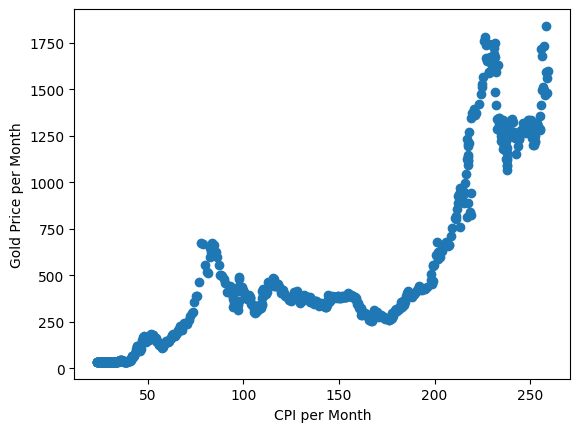

In [5]:
from importlib import reload
plt=reload(plt)
df_binary = gold_data[["CPI", "Price"]]
df_binary_modern = df_binary.iloc[500:]
df_binary_modern["CPI"] = df_binary_modern["CPI"].clip(-2, 2)
df_sorted = df_binary.sort_values(by=["CPI", "Price"])
print(df_binary_modern)

plt.scatter(df_binary["CPI"], df_binary["Price"])
plt.ylabel("Gold Price per Month")
plt.xlabel("CPI per Month")
plt.show()


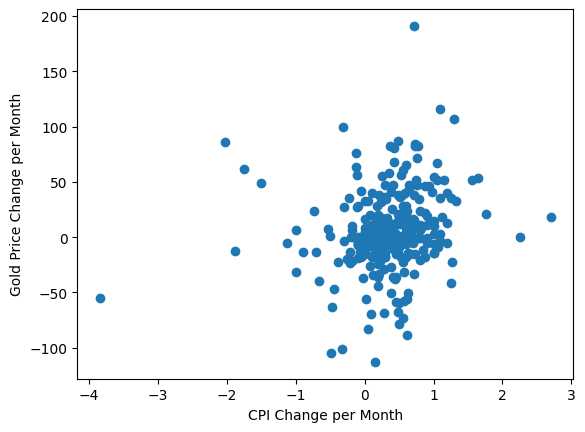

In [6]:
df_binary = gold_data[["CPI Change", "Price Change"]]
df_binary_modern = df_binary.iloc[500:]
plt.scatter(df_binary_modern["CPI Change"], df_binary_modern["Price Change"])
plt.ylabel("Gold Price Change per Month")
plt.xlabel("CPI Change per Month")
plt.show()

In [9]:
df_binary = gold_data[["CPI", "Price"]]
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(np.asarray(df_binary["CPI"]).reshape(-1, 1))
scaled_y = scaler.fit_transform(np.asarray(df_binary["Price"]).reshape(-1, 1))
unscaled_y = scaler.inverse_transform(scaled_y)

X = np.asarray(df_sorted["CPI"]).reshape(-1, 1)
y = np.asarray(df_sorted["Price"]).reshape(-1, 1)
y = np.ravel(scaled_y)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size = 0.2)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.7782471058714369


We have a roughly 75% accuracy with a plain linear model. Let's try and get it more accurate

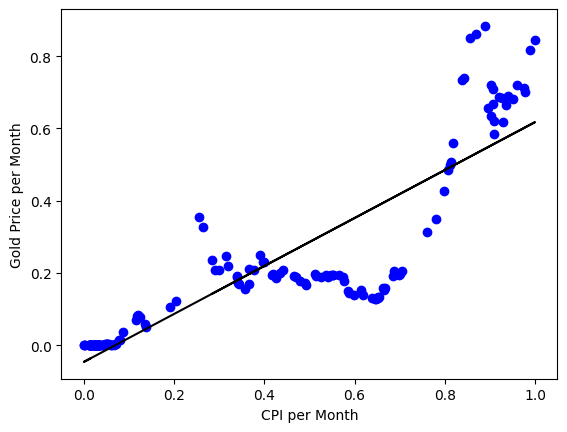

In [10]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.ylabel("Gold Price per Month")
plt.xlabel("CPI per Month")
plt.show()

In [11]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.7782471058714369


r2: 0.6800459158701252
MSE: 0.018565285656361202
[0.01348955], [4.98251414e-05]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Gold Price Change per Month')

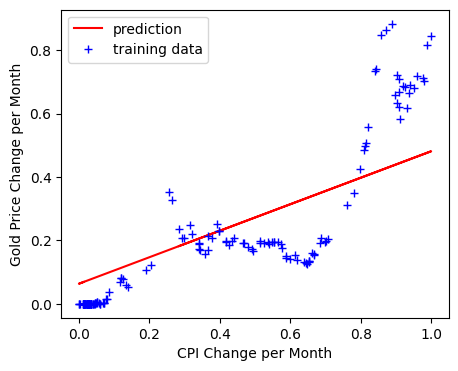

In [12]:
regr = SGDRegressor(max_iter=100000, alpha=0.01)

regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"r2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_test, y_pred, color="red", label="prediction")
ax.plot(X_test, y_test, "b+", label="training data")
print(f"{X_test[-1]}, {y_test[-1]}")
ax.legend(loc=2)
ax.set_xlabel("CPI Change per Month")
ax.set_ylabel("Gold Price Change per Month")

In [13]:
def GeneratePolynomialFeatures(X, polydegree):
    poly = PolynomialFeatures(degree=polydegree)
    polynomial_x = poly.fit_transform(X)# This is the new generated features.
    return polynomial_x

In [14]:
def calcVectorizedCost(X, Y, theta):
    inner = np.dot(((np.dot(X, theta)) - Y).T, (np.dot(X, theta)) - Y)
    return inner / (2 * len(X))

In [15]:
def gradientDescent(X, Y, theta, eta, iters):

    """
    Performs gradient descent optimization on a set of data

    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate
    iters: number of times to iterate the algorithm (epochs)
    output: return optimized theta and the cost array for each iteration (epoch).
    """
    cost = np.zeros(iters)

    for i in range(iters):
        gradients = 2 * (np.dot(X.T, ((np.dot(X, theta))) - Y)/ (len(X)))
        theta = theta - eta * gradients
        cost[i] = calcVectorizedCost(X, Y, theta)
    return theta, cost

In [25]:
scaled_X = np.asarray(df_binary["Price"]).reshape(-1, 1)
scaled_y = np.asarray(df_binary["CPI"]).reshape(-1, 1)


polydegree = 5
polynomial_x = GeneratePolynomialFeatures(scaled_X, polydegree)
print (polynomial_x.shape)

eta = 0.25
epochs = 100000
thetaInit = np.zeros((polynomial_x.shape[1], 1))
print(thetaInit)
theta, losses = gradientDescent(polynomial_x, scaled_y, thetaInit, eta, epochs)

(847, 6)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


/tmp/ipython-input-2080686170.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)
/tmp/ipython-input-2080686170.py:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


In [26]:
print (losses)
print (theta)

[4.45072117e+064 7.05421161e+125 1.11806378e+187 1.77208552e+248
             inf             inf             inf             inf
             inf             inf             inf             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan         

In [22]:
def plot_SimpleNonlinearRegression_line(theta, X, poly):

    """
    Plotting regression line for nonlinear regression
    theta: current weights (coefficients) for regression
    x: independent variable
    poly: the sklearn polynomialfeatures object being used to perform regression
    """
    # find min and max values
    min_x = np.min(X)
    max_x = np.max(X)
    # get range of data to transform and make predictions on
    min_max_range = np.linspace(min_x, max_x, 100).reshape(-1,1)
    polynomial_min_max_range = poly.fit_transform(min_max_range)
    y_vals = np.dot(polynomial_min_max_range, theta)
    plt.plot(min_max_range, y_vals)

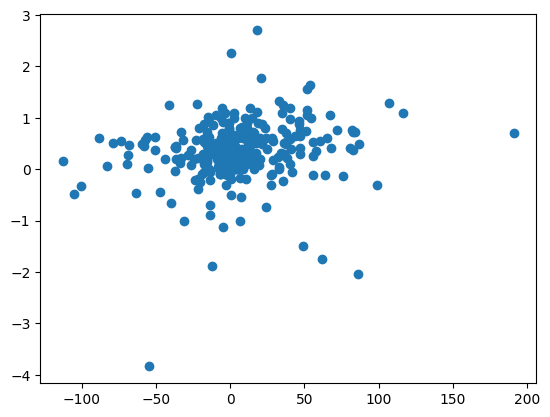

In [23]:
# plot of data and regression line
poly = PolynomialFeatures(polydegree)
plt.scatter(scaled_X, scaled_y, label='Traning Data')
plot_SimpleNonlinearRegression_line(theta, scaled_X, poly)

/tmp/ipython-input-2080686170.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)
/tmp/ipython-input-2080686170.py:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
/tmp/ipython-input-2080686170.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)
/tmp/ipython-input-2080686170.py:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
/tmp/ipython-input-2080686170.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.

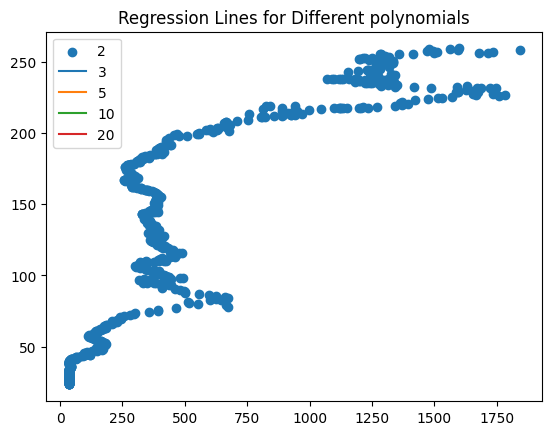

In [27]:
# Hyperparam initialization

eta = 0.25
epochs = 100000 # This will take a while but you can set it to 10000.
Poly_degree_values = [2, 3, 5, 10, 20]

# Initializing plot
plt.title("Regression Lines for Different polynomials")
plt.scatter(scaled_X, scaled_y, label='Traning Data')

# iterating over different alpha values (This is going to take a while)
for i in Poly_degree_values:
    polynomial_x  = GeneratePolynomialFeatures(scaled_X, i)
    thetaInit = np.zeros((polynomial_x.shape[1],1))
    theta, losses = gradientDescent(polynomial_x, scaled_y, thetaInit, eta, epochs)
    poly = PolynomialFeatures(i)
    plot_SimpleNonlinearRegression_line(theta, scaled_X, poly)

plt.legend(Poly_degree_values)
plt.show()

Let's try random forest

In [53]:
df_binary = gold_data[["Price", "CPI"]]
X = np.asarray(df_binary["CPI"]).reshape(-1, 1)
y = np.asarray(df_binary["Price"]).reshape(-1, 1)
y = np.ravel(y)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
regressor = RandomForestRegressor(n_estimators=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



Reg Mean Squared Error: 48.17
R-squared Score: 0.99


Text(0, 0.5, 'Gold Price per Month')

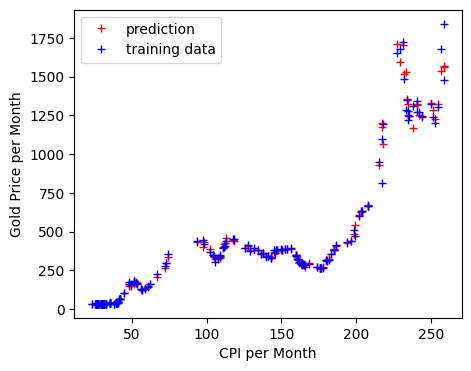

In [56]:
# Using CPI to predict Price
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Reg Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_test, y_pred, "r+", label="prediction")
ax.plot(X_test, y_test, "b+", label="training data")
ax.legend(loc=2)
ax.set_xlabel("CPI per Month")
ax.set_ylabel("Gold Price per Month")

In [57]:
single_data = [[240]]
predicted_value = regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
#print(f"Actual Value: {y_test.iloc[0]:.2f}")

Predicted Value: 1309.20


Reg Mean Squared Error: 28.20
R-squared Score: 0.86


Text(0, 0.5, 'CPI per Month')

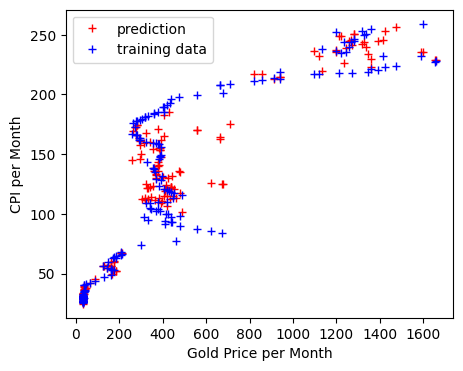

In [51]:
# Using Gold Price to predict CPI
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Reg Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X_test, y_pred,"r+", label="prediction")
ax.plot(X_test, y_test, "b+", label="training data")
ax.legend(loc=2)
ax.set_xlabel("Gold Price per Month")
ax.set_ylabel("CPI per Month")

In [52]:
single_data = [[1700]]
predicted_value = regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.4f}")
#print(f"Actual Value: {y_test.iloc[0]:.2f}")

Predicted Value: 239.4464
